In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Breast_Cancer_Diagnostic.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [17]:
df = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean','diagnosis']]
df.head()
df["diagnosis"].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
features = df.drop('diagnosis', axis=1)
target = df['diagnosis']

In [21]:
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [22]:
scaled_features = scaler.transform(features)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = scaled_features
y = target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [28]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [29]:
predictions = knn.predict(X_test)

In [30]:
from sklearn.metrics import classification_report,confusion_matrix
print (classification_report(y_test, predictions))
print (confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           B       0.95      0.94      0.95       121
           M       0.90      0.91      0.90        67

    accuracy                           0.93       188
   macro avg       0.92      0.93      0.92       188
weighted avg       0.93      0.93      0.93       188

[[114   7]
 [  6  61]]


In [31]:
# finding the best k value below

In [42]:
err_rate = []

for i in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    prediction_i = knn.predict(X_test)
    err_rate.append(np.mean(prediction_i != y_test))

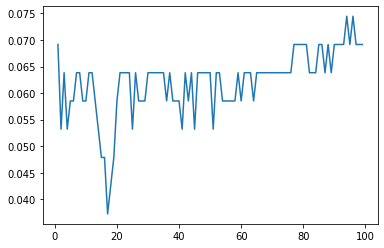

In [44]:
plt.plot(range(1,100),err_rate)

In [45]:
# optimal k value is 17

In [46]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
predictions = knn.predict(X_test)

In [47]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[118   3]
 [  4  63]]
              precision    recall  f1-score   support

           B       0.97      0.98      0.97       121
           M       0.95      0.94      0.95        67

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188



In [48]:
# we got a lot better evaluation values by k=17